In [2]:
import numpy as np
import scipy as sp
import sympy as smp
import matplotlib.pyplot as plt
from scipy.misc import derivative
from sympy.solvers import solve
from sympy import Symbol
from sympy import symbols, solve


KONKRETEN PROBLEM

Imamo stroj, ki ima življensko dobo $T_0$, ki je eksponentno porazdeljana s parametrom 
$\lambda_0 = 0.25$ okvar na leto. Torej je njegova povprčna življenska doba štiri leta.

Stroju se po vsakem popravilu življenjska doba skrajša za $20\%$

$$
T_k = 0.8^k T_0.
$$
Kar pomeni da po prvem opravilu dobimo $\lambda_1 =\frac{\lambda_0}{0.8}$ in tako dalje...

Predpostavimo, da stroški okvare vključujejo tako strošek popravila kot tudi 
izpad dohodka. Strošek nakupa novega stroja se pojavi enkrat na cikel 
(cikel traja od nakupa novega stroja do njegove zamenjave).

Označimo strošek popravila s $C_p = 600$, izpad dohodka $C_d = 250$,
strošek nakupa novega stroja pa s $C_n = 8000$.


Ker gre za eksponentno porazdelitev, izračunamo pričakovan čas do naslednje okvare s pomočjo parametra $\lambda_i$ in dobimo $$E[T_i] = \frac{1}{\lambda_i},$$ kjer je $$\lambda_i = \frac{\lambda_0}{0.8^i}.$$

Torej dobimo pričakovan čas do okvare po i-tem popravilu
$$
E[T_i] = 4 * 0.8^i
$$

Tako dobimo pričakovan čas cikla
$$
E[čas cikla] = \sum_{i = 0}^{k-1} 4 * 0.8^i,
$$
kar je geometrijska vrsta in dobimo
$$
E[čas cikla] = 4 * \frac{1 - 0.8^k}{1- 0.8} = 20(1 - 0.8^k)
$$

Sedaj pa se lotimo stroškov v ciklu. Po $k$ popravilih po strošek cikla enak $8000 + 850k$. Torej lahko definiramo funkcijo stroškov
$$
C(k) = 8000 + 850k
$$


Sedaj pa lahko izračunamo povprečni strošek na časovno enoto in dobimo ven optimalno vrednost $k$, pri kateri se bo še splačalo stroj popraviti. Povprečni strošek na enoto časa bomo predstavili s pomočjo funkcije
$$
AC(k) = \frac{C(k)}{E[čas cikla]} = \frac{8000 + 850k}{20(1-0.8^k)}
$$

To funkcijo sedaj odvajamo in dobimo optimalno vrednost kjer $k$ doseže svoj minimum.

In [ ]:
x = smp.symbols('x', real=True)

g = ((8000 + 850*x) / (20 * (1 - 0.8**x)))
dgdx = smp.diff(g, x)

sol = smp.nsolve(dgdx, 5)   #začetni ugib
print(sol)


6.87140170058084


Torej vidimo da se splača stroj popraviti 6-krat, potem pa je naša najboljša poteza da nakupimo novega.

Sedaj bomo pa preverili to še s pomočjo Monte-Carlo simulacij.

Optimal k = 7, minimalni strošek na leto = 880.88


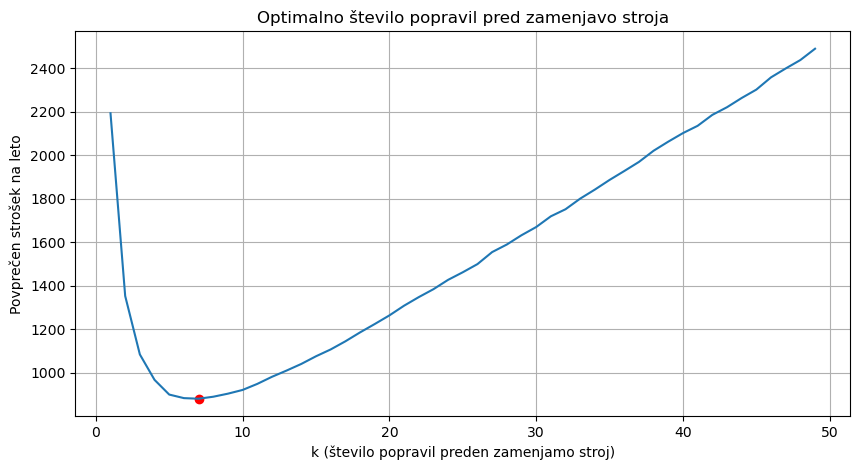

In [1]:
import numpy as np
import matplotlib.pyplot as plt

lambda0 = 0.25
C_r = 600   # strošek popravila
C_n = 8000  # strošek nakupa novega
C_d = 250   # izpad dohodkov

def simulate_cycle(k):
    total_time = 0
    total_cost = C_n  
    lamb = lambda0
    for i in range(k):
        t = np.random.exponential(1/lamb)
        total_time += t
        total_cost += C_r + C_d
        lamb /= 0.8   
    return total_cost, total_time

ks = range(1, 50)
avg_cost_per_year = []

for k in ks:
    costs = []
    times = []
    for _ in range(20000):
        c, t = simulate_cycle(k)
        costs.append(c)
        times.append(t)
    ratio = np.mean(costs) / np.mean(times)
    avg_cost_per_year.append(ratio)


optimal_k = ks[int(np.argmin(avg_cost_per_year))]
optimal_value = min(avg_cost_per_year)

print(f"Optimal k = {optimal_k}, minimalni strošek na leto = {optimal_value:.2f}")

# plot
plt.figure(figsize=(10, 5))
plt.plot(ks, avg_cost_per_year)
plt.scatter([optimal_k], [optimal_value], color='red')
plt.xlabel("k (število popravil preden zamenjamo stroj)")
plt.ylabel("Povprečen strošek na leto")
plt.title("Optimalno število popravil pred zamenjavo stroja")
plt.grid(True)
plt.show()
